# Import Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df = pd.read_csv("cosmetics.csv")


In [3]:
df.head(5)

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


# Exploratory Data Analysis

In [4]:
df.isnull().sum() #لاكتشاف البيانات المفقودة

Label          0
Brand          0
Name           0
Price          0
Rank           0
Ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [5]:
df['Ingredients'].fillna("No Info", inplace=True) #استبدال القيم المفقودة بـ "no info"

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB
None


In [7]:
df.drop_duplicates() #حذف الصفوف المتكررة

,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1467,Sun protect,KORRES,Yoghurt Nourishing Fluid Veil Face Sunscreen B...,35,3.9,"Water, Alcohol Denat., Potassium Cetyl Phospha...",1,1,1,1,1
1468,Sun protect,KATE SOMERVILLE,Daily Deflector™ Waterlight Broad Spectrum SPF...,48,3.6,"Water, Isododecane, Dimethicone, Butyloctyl Sa...",0,0,0,0,0
1469,Sun protect,VITA LIBERATA,Self Tan Dry Oil SPF 50,54,3.5,"Water, Dihydroxyacetone, Glycerin, Sclerocarya...",0,0,0,0,0
1470,Sun protect,ST. TROPEZ TANNING ESSENTIALS,Pro Light Self Tan Bronzing Mist,20,1.0,"Water, Dihydroxyacetone, Propylene Glycol, PPG...",0,0,0,0,0


C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


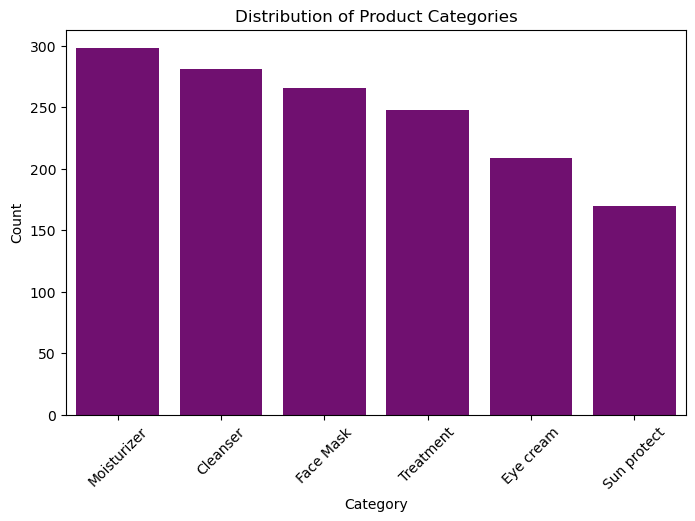

In [8]:
# حساب عدد المنتجات لكل فئة (مثل Moisturizer, Cleanser, ... )
category_counts = df['Label'].value_counts()

# رسم توزيع الفئات بتدرجات البنفسجي
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, color="Purple")
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Count")
plt.title("Distribution of Product Categories")
plt.show()

C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


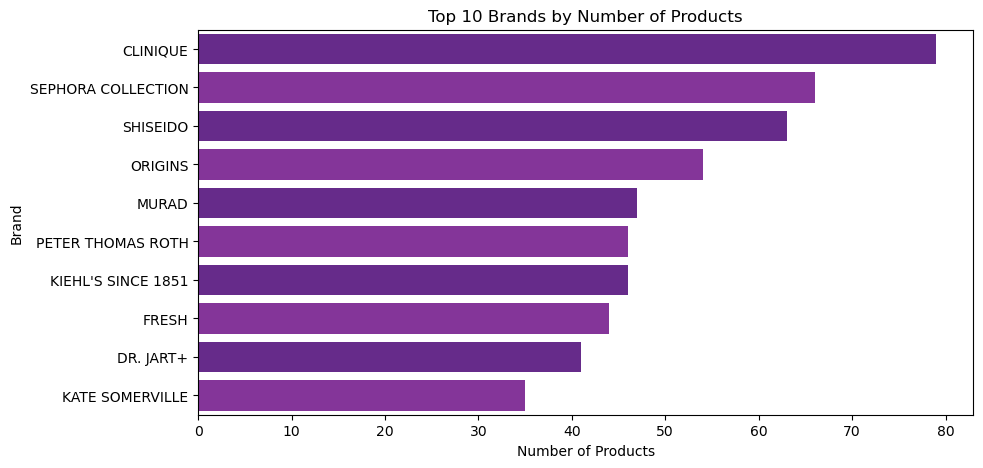

In [9]:
# حساب عدد المنتجات لكل علامة تجارية

top_brands = df['Brand'].value_counts().head(10)

# تخصيص درجتين من البنفسجي يدويًا
purple_shades = ["#6A1B9A", "#8E24AA"] * 5  # تكرار الدرجتين لتغطية كل الأعمدة

# رسم التوزيع
plt.figure(figsize=(10, 5))
sns.barplot(y=top_brands.index, x=top_brands.values, palette=purple_shades)
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.title("Top 10 Brands by Number of Products")
plt.show()

C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


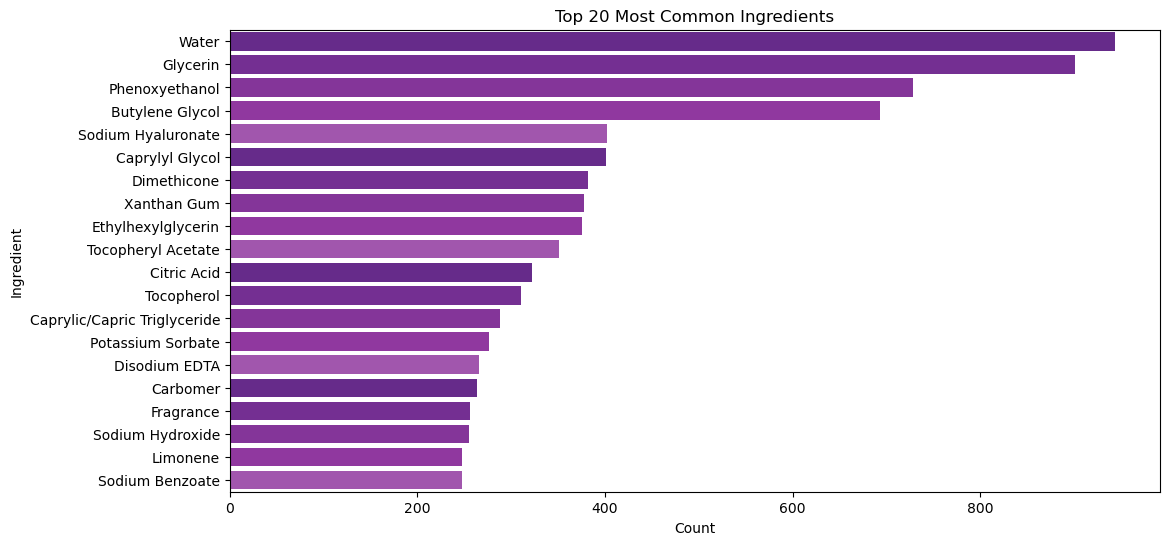

In [10]:
from collections import Counter
# استخراج قائمة جميع المكونات
all_ingredients = df['Ingredients'].dropna().str.split(", ").sum()

# حساب تكرار كل مكون
ingredient_counts = Counter(all_ingredients)
common_ingredients = ingredient_counts.most_common(20)  # استخراج أعلى 20 مكونًا شائعًا

# تحويل إلى DataFrame لسهولة الرسم
ingredient_df = pd.DataFrame(common_ingredients, columns=['Ingredient', 'Count'])

# تدرجات بنفسجي (غامق + 4 أفتح منه)
purple_shades = ["#6A1B9A", "#7B1FA2", "#8E24AA", "#9C27B0", "#AB47BC"] * 4  # يغطي 20 عمود

# رسم التوزيع
plt.figure(figsize=(12, 6))
sns.barplot(y=ingredient_df['Ingredient'], x=ingredient_df['Count'], palette=purple_shades)
plt.xlabel("Count")
plt.ylabel("Ingredient")
plt.title("Top 20 Most Common Ingredients")
plt.show()

C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kaz12\Downloads\ana\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


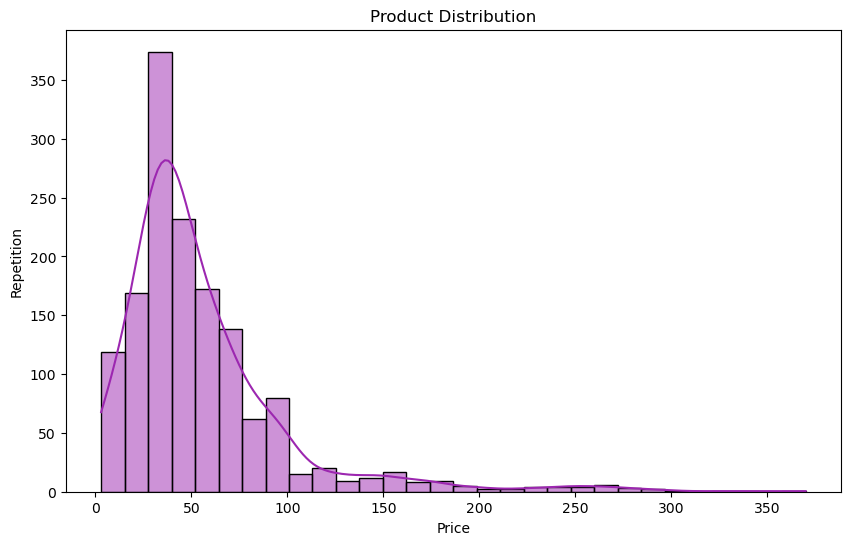

In [11]:
#توزيع الاسعار للمنتجات
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='#9C27B0')  # البنفسجي الفاتح الرابع
plt.title('Product Distribution')
plt.xlabel('Price')
plt.ylabel('Repetition')
plt.show()

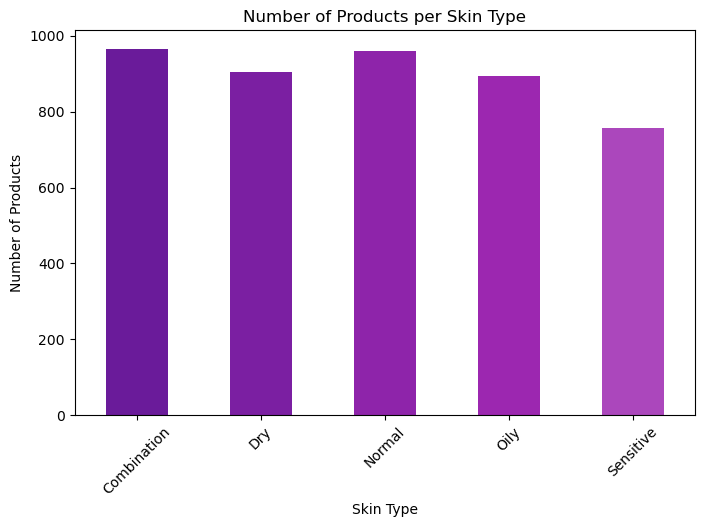

In [12]:
# مقارنة عدد المنتجات لكل نوع بشرة
plt.figure(figsize=(8, 5))
skin_columns = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
colors = ['#6A1B9A', '#7B1FA2', '#8E24AA', '#9C27B0', '#AB47BC']  # درجات البنفسجي

df[skin_columns].sum().plot(kind='bar', color=colors)
plt.title('Number of Products per Skin Type')
plt.xlabel('Skin Type')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Converting components into numerical features using TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

#  تحويل النصوص إلى تمثيل عددي باستخدام TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
ingredient_matrix = vectorizer.fit_transform(df['Ingredients'])

# عرض شكل المصفوفة
print("TF-IDF Matrix Shape:", ingredient_matrix.shape)

TF-IDF Matrix Shape: (1472, 4450)


# K- Nearest Neighbors (knn)

In [14]:
from sklearn.neighbors import NearestNeighbors

# إنشاء نموذج KNN
knn_model = NearestNeighbors(n_neighbors=2, metric='cosine')

# تدريب النموذج
knn_model.fit(ingredient_matrix)

print("تم تدريب نموذج KNN بنجاح!")

تم تدريب نموذج KNN بنجاح!


# Recommendation function based on skin type, ranked by best rated and lowest price

In [15]:
df.columns = df.columns.str.strip()  # تنظيف الأعمدة من الفراغات

def recommend_by_skin_type(skin_type, top_n=5):
    # التحقق من صحة نوع البشرة
    if skin_type not in ["Oily", "Dry", "Normal", "Combination", "Sensitive"]:
        print("❌ نوع البشرة غير معروف.")
        return []

    # تصفية المنتجات المناسبة
    filtered = df[df[skin_type] == 1]

    # ترتيب حسب الأعلى تقييمًا ثم الأقل سعرًا
    sorted_df = filtered.sort_values(by=["Rank", "Price"], ascending=[False, True])

    return sorted_df[["Brand", "Name", "Price", "Rank"]].head(top_n)

# Suggest products based on ingredient similarity 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# تجهيز TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
ingredient_matrix = tfidf.fit_transform(df['Ingredients'])

# تدريب KNN
knn = NearestNeighbors(n_neighbors=6, metric='cosine')  # 6 علشان نستبعد المنتج نفسه
knn.fit(ingredient_matrix)

def recommend_by_product(product_name, n=5):
    # الحصول على الفهرس
    try:
        index = df[df['Name'].str.lower() == product_name.lower()].index[0]
    except IndexError:
        print("❌ المنتج غير موجود.")
        return []

    # الحصول على أقرب المنتجات
    distances, indices = knn.kneighbors(ingredient_matrix[index], n_neighbors=n+1)
    similar_indices = indices[0][1:]  # نتجاهل أول نتيجة لأنها نفسها

    # استخراج المنتجات المشابهة
    recommended = df.iloc[similar_indices][["Brand", "Name", "Price", "Rank"]]
    recommended = recommended.sort_values(by="Rank", ascending=False)

    return recommended.head(n)

# Show recommendation results


In [17]:
# مثال على الاستخدام:
print(recommend_by_skin_type("Oily"))

print(recommend_by_product("The Water Cream"))


                  Brand                                               Name  \
966  SEPHORA COLLECTION                      Sleeping Mask - Coconut Water   
974  SEPHORA COLLECTION                          Sleeping Mask - Aloe Vera   
953  SEPHORA COLLECTION                 Face Mask - Grape - Anti-pollution   
954               FOREO  Make My Day Hydrating & Anti-Pollution UFO™ Ac...   
988            GLAMGLOW  BUBBLESHEET™ Oxygenating Deep Cleanse Mask - B...   

     Price  Rank  
966      4   5.0  
974      4   5.0  
953      6   5.0  
954      9   5.0  
988      9   5.0  
           Brand                                               Name  Price  \
1308      TATCHA  Silken Pore Perfecting Sunscreen Broad Spectru...     65   
186   SUPERGOOP!  CC Cream Daily Correct Broad Spectrum SPF 35+ ...     34   
879       TATCHA                      Luminous Dewy Skin Sheet Mask     12   
1331  PHILOSOPHY                    Renewed Hope in a Jar Skin Tint     39   
1197    SHISEIDO           

# Model Evalution by using cosine similarity

                         Name           Brand  Price
0             Crème de la Mer          LA MER    175
1    Facial Treatment Essence           SK-II    179
2  Protini™ Polypeptide Cream  DRUNK ELEPHANT     68


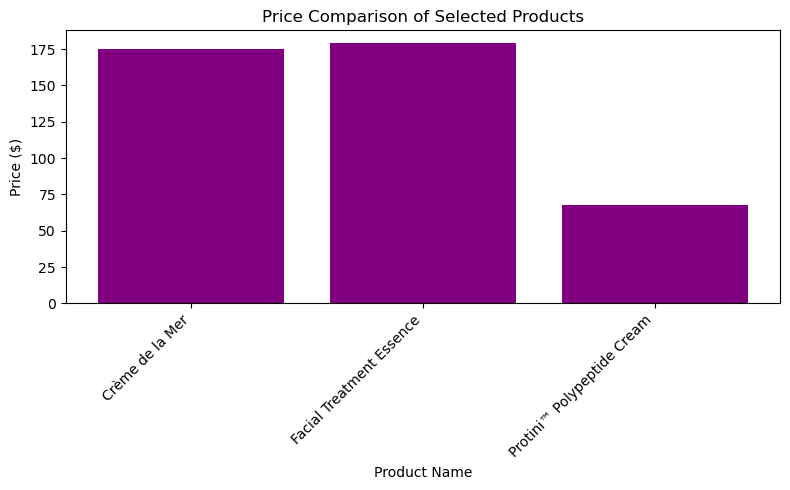

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# تحميل البيانات
df = pd.read_csv("cosmetics.csv")

# استبعاد المنتجات التي تحتوي على كلمة "Mini"
df_filtered = df[~df['Name'].str.contains("Mini", case=False, na=False)].reset_index(drop=True)

# إنشاء مصفوفة TF-IDF من المكونات
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df_filtered['Ingredients'])

# المنتجات الأصلية
selected_names = [
    "Crème de la Mer",
    "Facial Treatment Essence",
    "Protini™ Polypeptide Cream"
]

# قائمة المنتجات البديلة
new_selected_indices = []

for name in selected_names:
    if name in df_filtered['Name'].values:
        idx = df_filtered[df_filtered['Name'] == name].index[0]
        new_selected_indices.append(idx)
    else:
        # العثور على مكونات المنتج الأصلي من البيانات الأصلية (حتى لو تم استبعاده لاحقاً)
        original_ingredients = df[df['Name'] == name]['Ingredients'].values[0]
        original_vector = tfidf.transform([original_ingredients])
        similarities = cosine_similarity(original_vector, tfidf_matrix).flatten()

        # اختيار أقرب منتج مشابه
        similar_idx = similarities.argsort()[::-1]
        for idx in similar_idx:
            candidate_name = df_filtered.loc[idx, 'Name']
            if candidate_name not in selected_names:
                new_selected_indices.append(idx)
                break

# عرض النتائج
recommended_products = df_filtered.loc[new_selected_indices, ['Name', 'Brand', 'Price']]
print(recommended_products)

# رسم بياني للأسعار
plt.figure(figsize=(8, 5))
plt.bar(recommended_products['Name'], recommended_products['Price'], color='purple')
plt.xlabel('Product Name')
plt.ylabel('Price ($)')
plt.title('Price Comparison of Selected Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

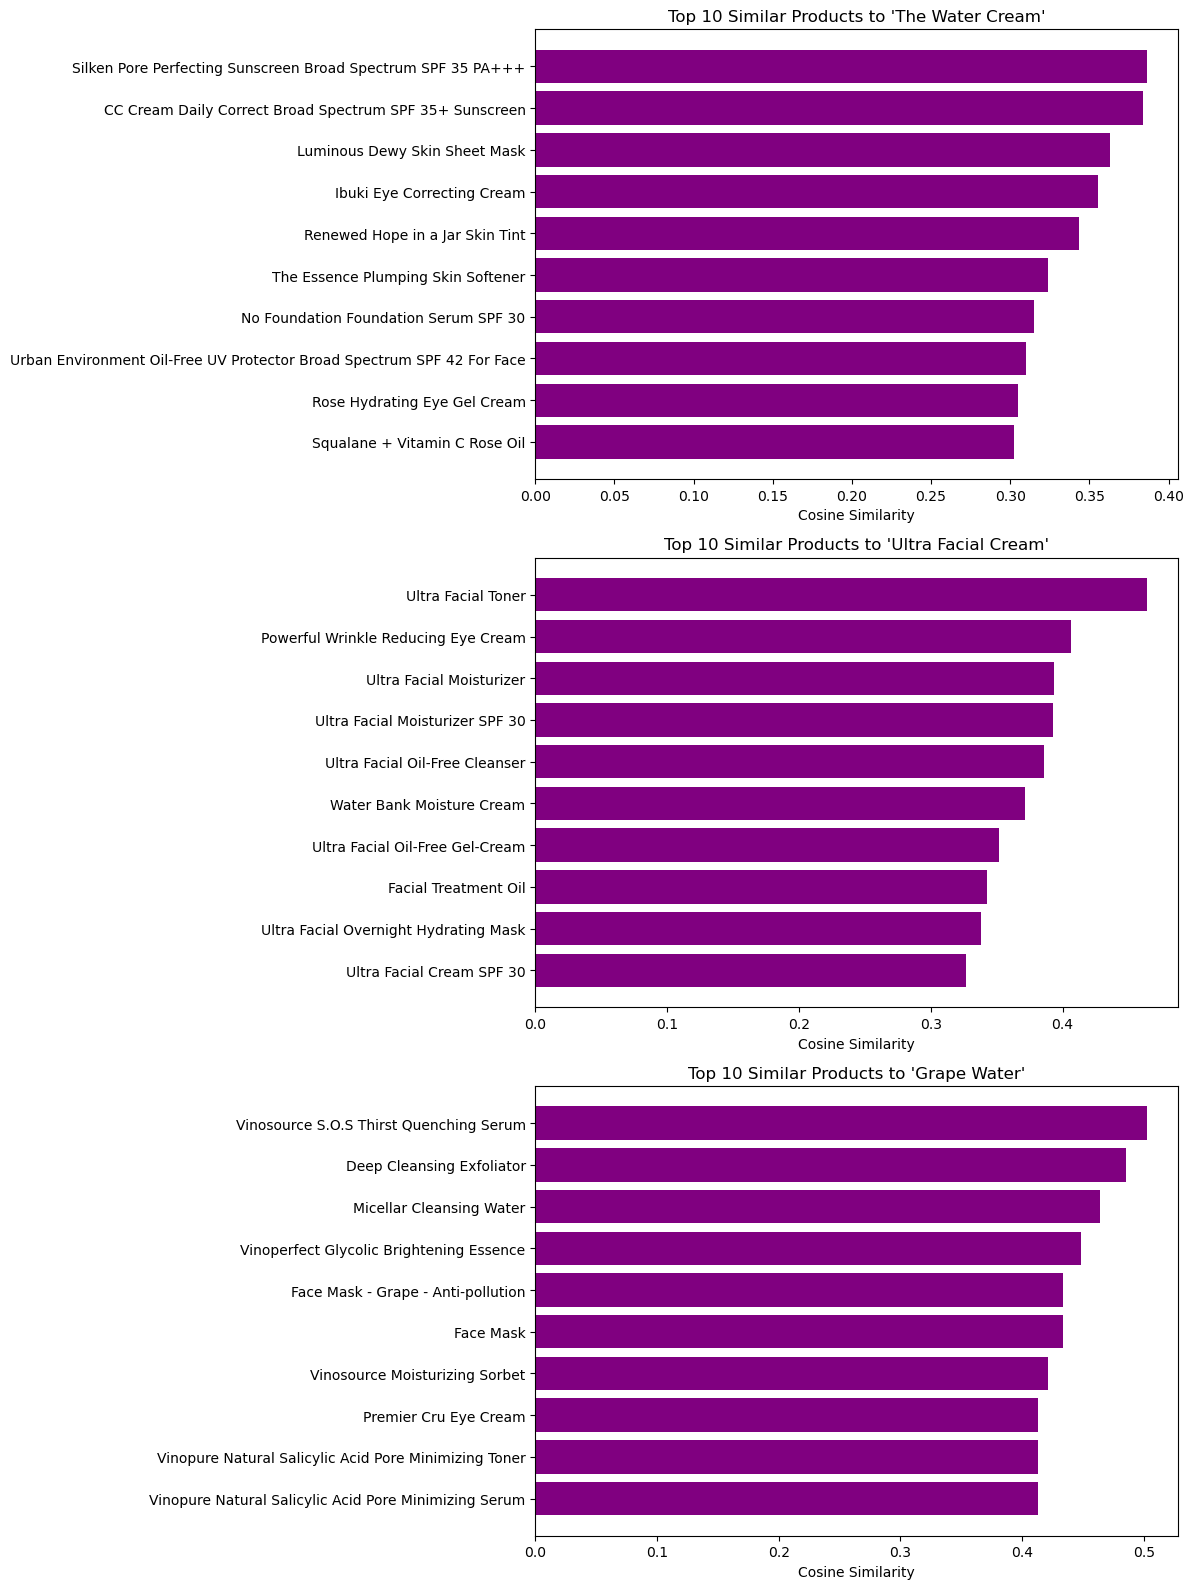

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
df = pd.read_csv("cosmetics.csv")  
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df['Ingredients'])
selected_names = [
    "The Water Cream",
    "Ultra Facial Cream",
    "Grape Water"
]
fig, axs = plt.subplots(3, 1, figsize=(12, 16))
top_similar_all = []

for i, name in enumerate(selected_names):
    target_product = df[df['Name'] == name].iloc[0]
    target_index = df[df['Name'] == name].index[0]

    cos_similarities = cosine_similarity(tfidf_matrix[target_index], tfidf_matrix).flatten()
    df['Cosine_Similarity'] = cos_similarities

    similar_products = df[df['Name'] != name].sort_values(by='Cosine_Similarity', ascending=False).head(10)
    top_similar_all.append(similar_products[['Name', 'Brand', 'Cosine_Similarity']])

    # رسم النتائج
    axs[i].barh(similar_products['Name'], similar_products['Cosine_Similarity'], color='purple')
    axs[i].set_title(f"Top 10 Similar Products to '{name}'")
    axs[i].invert_yaxis()
    axs[i].set_xlabel("Cosine Similarity")

plt.tight_layout()
plt.show()

# Visualization of Similarity Matrix

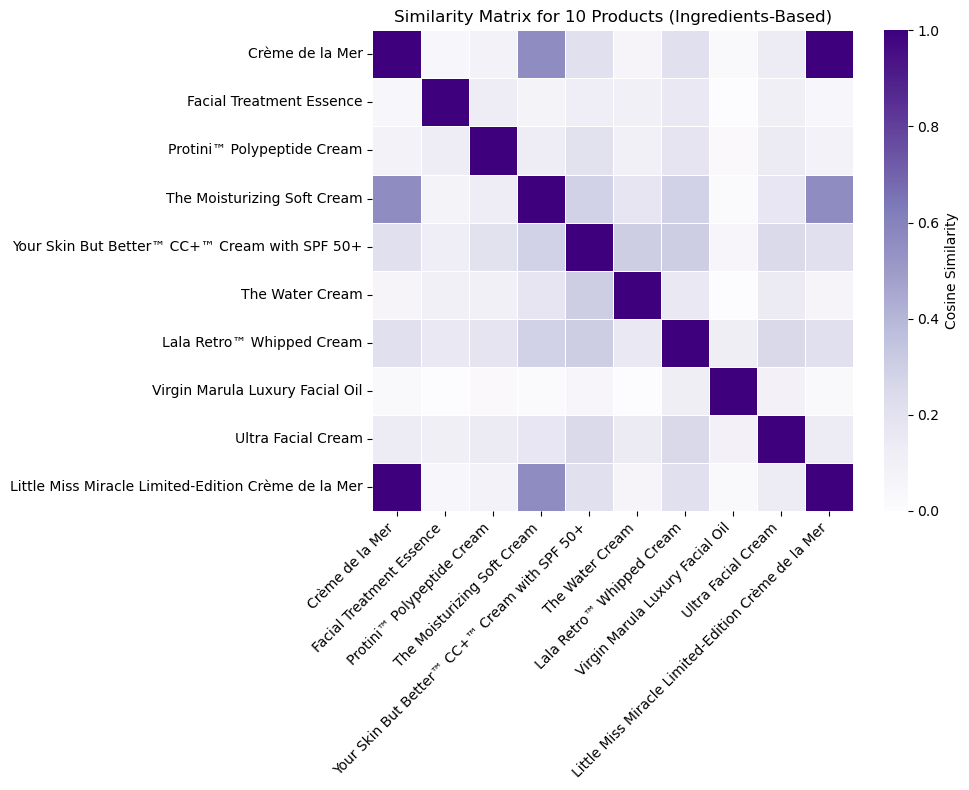

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# تحميل البيانات
df = pd.read_csv("cosmetics.csv")

# تجهيز البيانات لأول 10 منتجات
subset_df_10 = df['Ingredients'].fillna("").iloc[:10]
product_names_10 = df['Name'].iloc[:10]

# تحويل النصوص إلى تمثيل رقمي باستخدام TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix_10 = tfidf_vectorizer.fit_transform(subset_df_10)

# حساب مصفوفة التشابه
similarity_matrix_10 = cosine_similarity(tfidf_matrix_10)

# رسم Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix_10, 
            xticklabels=product_names_10, 
            yticklabels=product_names_10,
            cmap="Purples", square=True, linewidths=0.5,
            cbar_kws={"label": "Cosine Similarity"})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title("Similarity Matrix for 10 Products (Ingredients-Based)")
plt.tight_layout()
plt.show()

#  Cosine- Based Diversity score

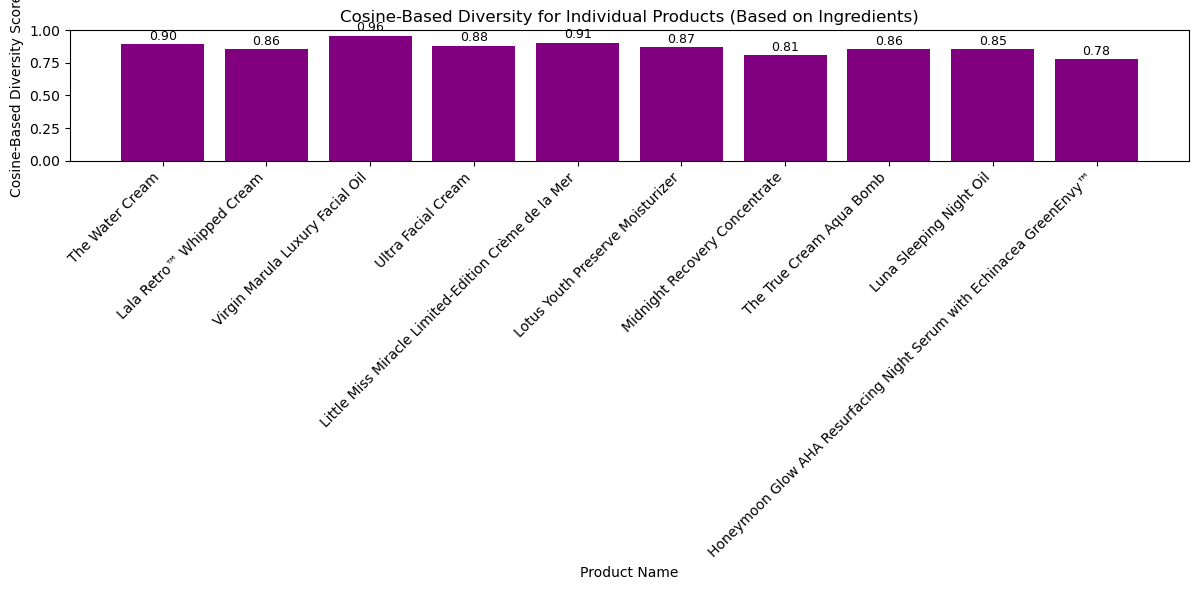

In [20]:
import matplotlib.pyplot as plt

# تحميل البيانات
df = pd.read_csv("cosmetics.csv")

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# تحويل نصوص المكونات إلى تمثيل عددي باستخدام TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Ingredients'].fillna(""))

# نختار 10 منتجات من وسط البيانات
cosine_scores = []
product_names_cosine = []

for i in range(5, 15):  # من المنتج رقم 5 إلى 14
    product_index = i
    product_vector = tfidf_matrix[product_index]  # تمثيل المكونات للمنتج الأساسي

    # نأخذ مجموعة صغيرة حوله: 2 قبله، هو، 2 بعده
    group_indices = list(range(i-2, i+3))
    group_vectors = tfidf_matrix[group_indices]

    # نحسب درجة التشابه بين المنتج وهذه المجموعة
    similarities = cosine_similarity(product_vector, group_vectors).flatten()

    # نأخذ المتوسط بعد استبعاد التشابه مع نفسه (وهو 1.0 دائمًا)
    mean_similarity = (sum(similarities) - 1) / (len(similarities) - 1)

    # نحسب درجة التنوع = 1 - التشابه
    diversity_score = 1 - mean_similarity
    cosine_scores.append(diversity_score)
    product_names_cosine.append(df.iloc[i]['Name'])

# رسم النتائج
plt.figure(figsize=(12, 6))
bars = plt.bar(product_names_cosine, cosine_scores, color='purple')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel('Cosine-Based Diversity Score')
plt.xlabel('Product Name')
plt.title('Cosine-Based Diversity for Individual Products (Based on Ingredients)')

# كتابة القيمة فوق كل عمود
for bar, score in zip(bars, cosine_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Jaccard Diversity

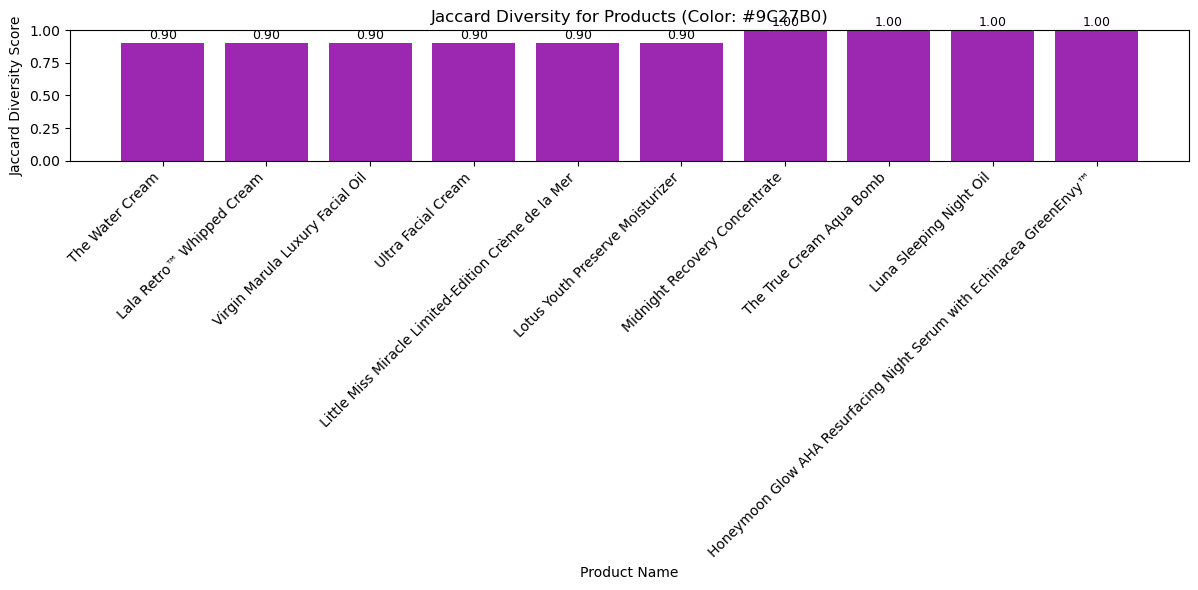

In [21]:
import matplotlib.pyplot as plt

# تحميل البيانات

df = pd.read_csv("cosmetics.csv")

# معالجة القيم الفارغة في عمود البراند
df['Brand'] = df['Brand'].fillna("Unknown")

# تعريف دالة Jaccard Diversity
def evaluate_recommendation_diversity(recommendations, brand_column="Brand"):
    n = len(recommendations)
    if n <= 1:
        return 0

    diversity = 0
    count = 0

    for i in range(n):
        for j in range(i + 1, n):
            brand_i = recommendations.iloc[i][brand_column]
            brand_j = recommendations.iloc[j][brand_column]
            intersection = 1 if brand_i == brand_j else 0
            union = 2 if brand_i != brand_j else 1
            jaccard_similarity = intersection / union
            diversity += (1 - jaccard_similarity)
            count += 1

    return diversity / count

# حساب Jaccard Diversity لمنتجات وسطية في مجموعات من 5
jaccard_scores = []
product_names = []

for i in range(5, 15):  # 10 منتجات من وسط البيانات
    group_df = df.iloc[i-2:i+3]
    score = evaluate_recommendation_diversity(group_df)
    jaccard_scores.append(score)
    product_names.append(df.iloc[i]['Name'])

# اللون البنفسجي المطلوب
custom_purple = "#9C27B0"

# رسم الرسم البياني
plt.figure(figsize=(12, 6))
bars = plt.bar(product_names, jaccard_scores, color=custom_purple)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel('Jaccard Diversity Score')
plt.xlabel('Product Name')
plt.title('Jaccard Diversity for Products (Color: #9C27B0)')

# كتابة القيم فوق الأعمدة
for bar, score in zip(bars, jaccard_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
             f"{score:.2f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [22]:
# كتابة تقرير لفظي بناءً على درجة Jaccard Diversity
for name, score in zip(product_names, jaccard_scores):
    if score >= 0.8:
        level = "تنوع عالي"
    elif score >= 0.5:
        level = "تنوع متوسط"
    else:
        level = "تنوع منخفض"
    
    print(f"المنتج: '{name}' | درجة Jaccard Diversity: {score:.2f} → {level} (كلما اقترب من 1 زاد التنوع)")

المنتج: 'The Water Cream' | درجة Jaccard Diversity: 0.90 → تنوع عالي (كلما اقترب من 1 زاد التنوع)
المنتج: 'Lala Retro™ Whipped Cream' | درجة Jaccard Diversity: 0.90 → تنوع عالي (كلما اقترب من 1 زاد التنوع)
المنتج: 'Virgin Marula Luxury Facial Oil' | درجة Jaccard Diversity: 0.90 → تنوع عالي (كلما اقترب من 1 زاد التنوع)
المنتج: 'Ultra Facial Cream' | درجة Jaccard Diversity: 0.90 → تنوع عالي (كلما اقترب من 1 زاد التنوع)
المنتج: 'Little Miss Miracle Limited-Edition Crème de la Mer' | درجة Jaccard Diversity: 0.90 → تنوع عالي (كلما اقترب من 1 زاد التنوع)
المنتج: 'Lotus Youth Preserve Moisturizer' | درجة Jaccard Diversity: 0.90 → تنوع عالي (كلما اقترب من 1 زاد التنوع)
المنتج: 'Midnight Recovery Concentrate' | درجة Jaccard Diversity: 1.00 → تنوع عالي (كلما اقترب من 1 زاد التنوع)
المنتج: 'The True Cream Aqua Bomb' | درجة Jaccard Diversity: 1.00 → تنوع عالي (كلما اقترب من 1 زاد التنوع)
المنتج: 'Luna Sleeping Night Oil' | درجة Jaccard Diversity: 1.00 → تنوع عالي (كلما اقترب من 1 زاد التنوع)
المنت

In [23]:
 df = pd.read_csv("cosmetics.csv")

# استخدام الكود لحساب تنوع أول 10 توصيات
diversity_score = evaluate_recommendation_diversity(df.head(10))
print("Jaccard Brand Diversity:", diversity_score)

Jaccard Brand Diversity: 0.8666666666666667


# Relative Coverage 

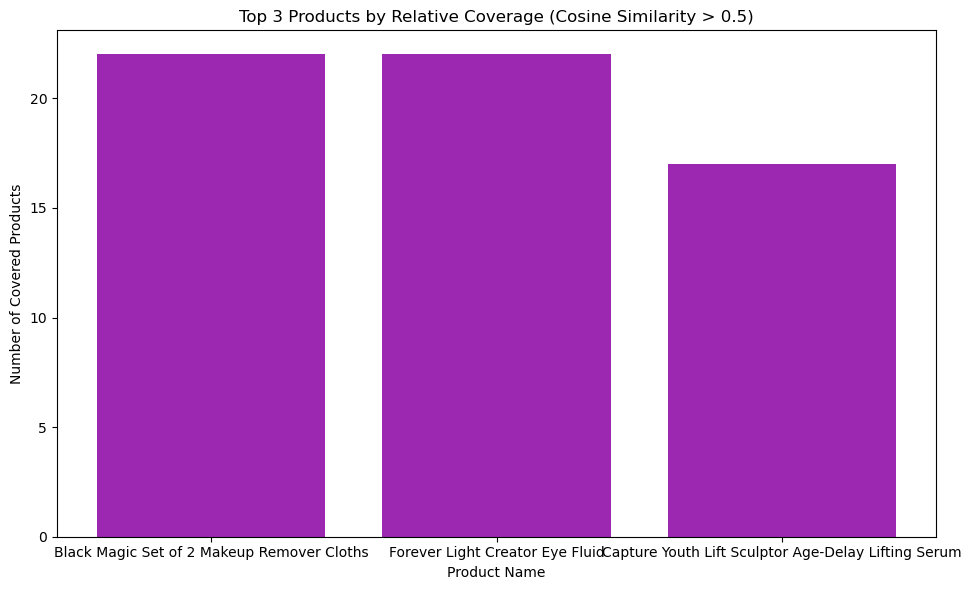

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# تحميل البيانات
df = pd.read_csv("cosmetics.csv")

# تجهيز مصفوفة المكونات
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df['Ingredients'].fillna(""))

# أخذ عينة عشوائية من 100 منتج
np.random.seed(42)
sample_indices = np.random.choice(len(df), size=100, replace=False)

# نحسب عدد المنتجات اللي يغطيها كل منتج
relative_coverage_full = []

for i in sample_indices:
    product_vector = tfidf_matrix[i]
    cosine_similarities = cosine_similarity(product_vector, tfidf_matrix).flatten()
    recommended_indices = [j for j, score in enumerate(cosine_similarities) if score > 0.5 and j != i]
    count = len(set(recommended_indices))
    relative_coverage_full.append((df.iloc[i]['Name'], count))

# نختار أعلى 3 منتجات فعليًا في التغطية
top_3_relative = sorted(relative_coverage_full, key=lambda x: x[1], reverse=True)[:3]

# تجهيز البيانات
top_3_names = [item[0] for item in top_3_relative]
top_3_counts_relative = [item[1] for item in top_3_relative]

# رسم الرسم البياني
plt.figure(figsize=(10, 6))
plt.bar(top_3_names, top_3_counts_relative, color="#9C27B0")
plt.ylabel("Number of Covered Products")
plt.xlabel("Product Name")
plt.title("Top 3 Products by Relative Coverage (Cosine Similarity > 0.5)")
plt.tight_layout()
plt.show()

# Novelty

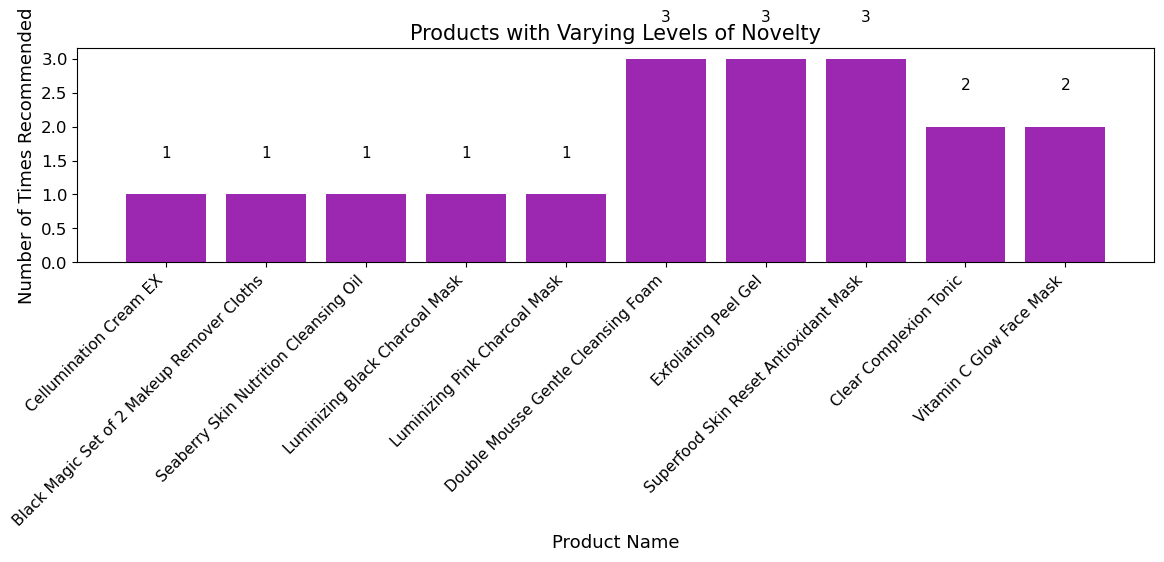

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# تحميل البيانات
df = pd.read_csv("cosmetics.csv")

# تجهيز TF-IDF للمكونات
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(df['Ingredients'].fillna(""))

# أخذ عينة عشوائية
np.random.seed(42)
sample_indices = np.random.choice(len(df), size=100, replace=False)

# حساب عدد مرات التوصية لكل منتج
recommendation_counts = {}

for i in sample_indices:
    product_vector = tfidf_matrix[i]
    cosine_similarities = cosine_similarity(product_vector, tfidf_matrix).flatten()
    recommended_indices = [j for j, score in enumerate(cosine_similarities) if score > 0.5 and j != i]

    for idx in recommended_indices:
        product_name = df.iloc[idx]['Name']
        if product_name in recommendation_counts:
            recommendation_counts[product_name] += 1
        else:
            recommendation_counts[product_name] = 1

# إنشاء DataFrame واختيار 5 نادرة + 5 كثيرة الظهور
novelty_mix_df = pd.DataFrame(list(recommendation_counts.items()), columns=["Product", "Recommendation Count"])
novelty_mix_df = pd.concat([
    novelty_mix_df.sort_values(by="Recommendation Count").head(5),
    novelty_mix_df.sort_values(by="Recommendation Count", ascending=False).head(5)
])

# رسم التفاوت في مرات التوصية
plt.figure(figsize=(12, 6))
bars = plt.bar(novelty_mix_df["Product"], novelty_mix_df["Recommendation Count"], color="#9C27B0")
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=12)
plt.ylabel("Number of Times Recommended", fontsize=13)
plt.xlabel("Product Name", fontsize=13)
plt.title("Products with Varying Levels of Novelty", fontsize=15)

# كتابة القيم فوق الأعمدة
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()